### Objetive
The objective is to determine in which regions, such as states, counties or cities, the greatest number of electric vehicles are concentrated.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
import os
print(os.getcwd())


/Users/melissa/Practica1


In [90]:
df = pd.read_csv('Electric Vehicle Population Data.csv')
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [92]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

In [29]:
df.isnull().sum()


VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        27
Base MSRP                                             27
Legislative District                                 481
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [47]:
#Since the objective is focused on geographic analysis and electric vehicle concentration, some columns are not useful.
df = df.drop(columns=['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Legislative District'])

KeyError: "['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Legislative District'] not found in axis"

In [43]:
# Remove duplicate rows
df = df.drop_duplicates()


In [49]:
# Fill in missing values in categorical columns with the mode (most frequent value).
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

# Fill missing values in numeric columns with the median
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
df['Base MSRP'] = df['Base MSRP'].fillna(df['Base MSRP'].median())

# Check if there are missing values after backfilling
print(df.isnull().sum())


County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Electric Utility                                     0
2020 Census Tract                                    4
dtype: int64


In [51]:
df = df.dropna(subset=['2020 Census Tract'])
print(df.isnull().sum())


County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [55]:
# Descriptive statistics for numeric columns
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,2020 Census Tract
count,129449.000000,129449.000000,129449.000000,129449.000000,1.294490e+05
mean,98160.887006,2020.927732,52.297507,1229.056810,5.293800e+10
std,3317.013688,3.283935,85.204184,8939.496262,2.001540e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.001020e+09
25%,98065.000000,2019.000000,0.000000,0.000000,5.303301e+10
50%,98204.000000,2022.000000,14.000000,0.000000,5.303303e+10
75%,98466.000000,2023.000000,48.000000,0.000000,5.305795e+10
max,99577.000000,2025.000000,337.000000,845000.000000,5.602100e+10


In [57]:
# Count the number of electric vehicles by state
state_counts = df['State'].value_counts()

# Count the number of electric vehicles by county
county_counts = df['County'].value_counts()

# Count the number of electric vehicles by city
city_counts = df['City'].value_counts()

# Display the top 10 states with the most electric vehicles
print(state_counts.head(10))

# Display the top 10 counties with the most electric vehicles
print(county_counts.head(10))

# Display the top 10 cities with the most electric vehicles
print(city_counts.head(10))


State
WA    128978
CA       113
VA        62
MD        36
TX        30
CO        18
NC        18
FL        16
GA        14
NY        12
Name: count, dtype: int64
County
King         54951
Snohomish    15206
Pierce       12602
Clark         8680
Spokane       5005
Thurston      4979
Kitsap        4919
Whatcom       3800
Benton        2059
Skagit        1944
Name: count, dtype: int64
City
Seattle      20342
Vancouver     5309
Bellevue      4602
Tacoma        3676
Olympia       3060
Bothell       3036
Spokane       2967
Renton        2961
Kirkland      2790
Redmond       2729
Name: count, dtype: int64


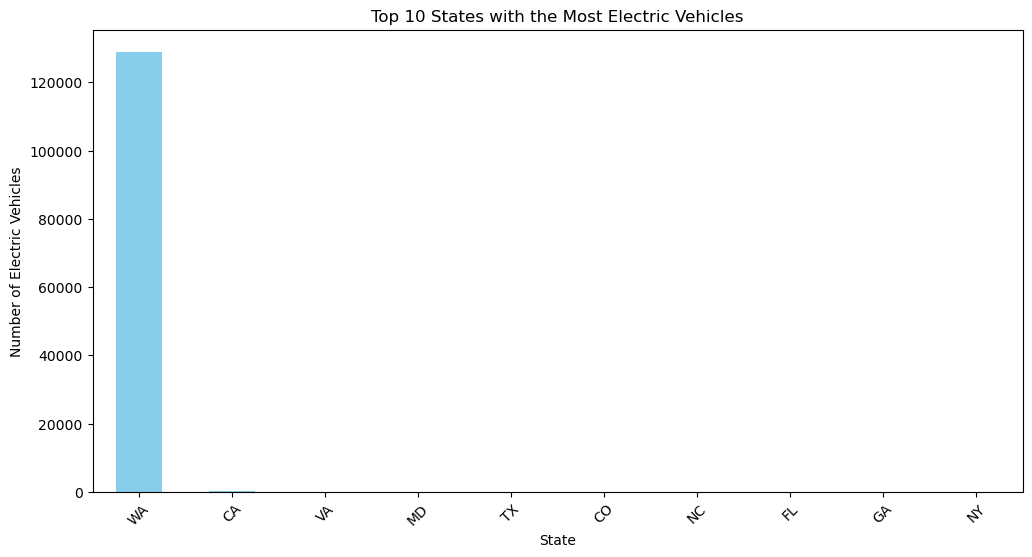

In [79]:
# Bar chart for top 10 states with the most electric vehicles
plt.figure(figsize=(12,6))
state_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States with the Most Electric Vehicles')
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.show()



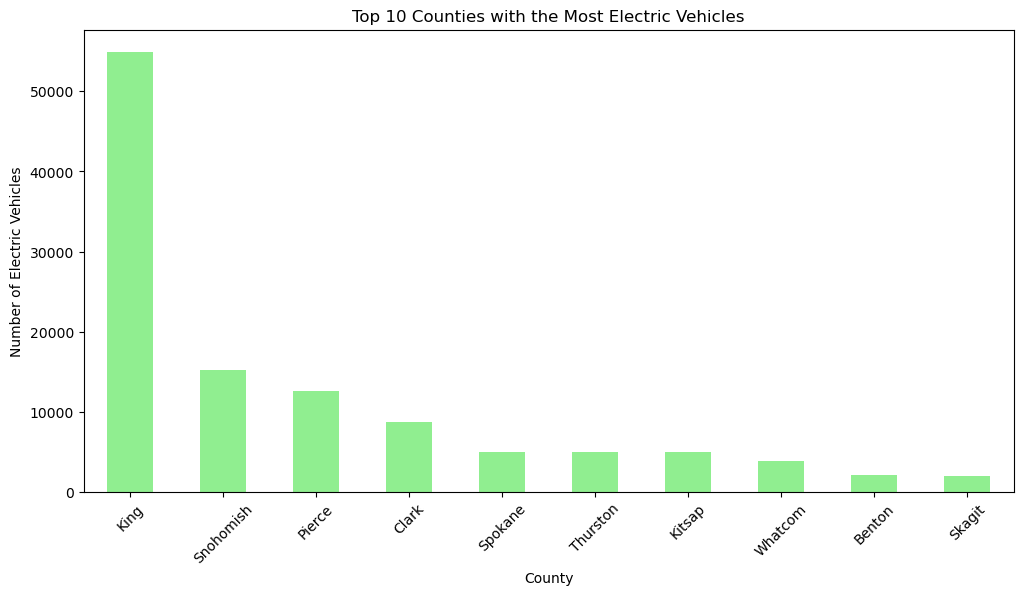

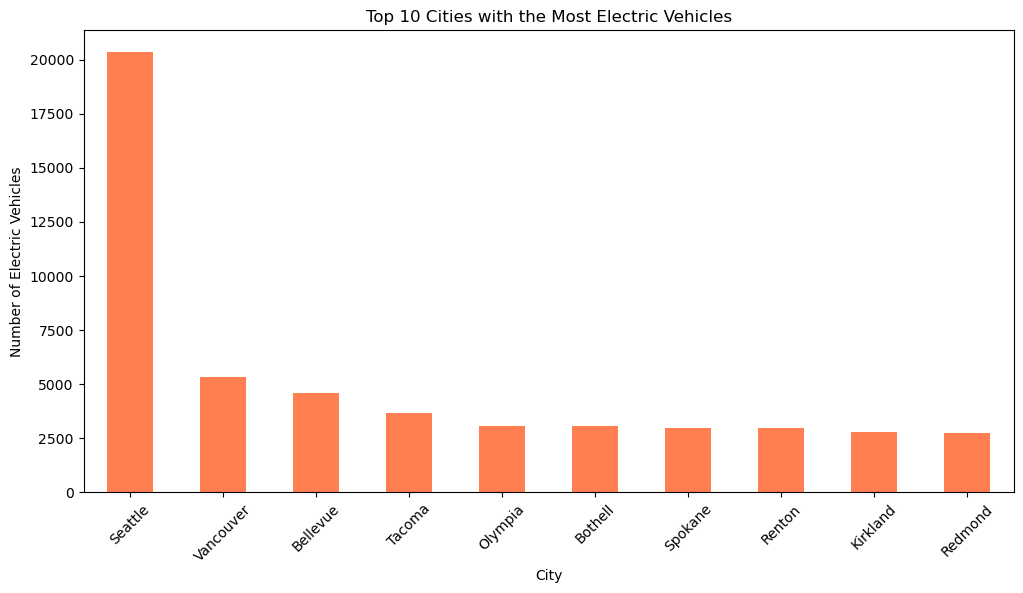

In [67]:
# Bar chart for top 10 cities with the most electric vehicles
plt.figure(figsize=(12,6))
city_counts.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Cities with the Most Electric Vehicles')
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.show()


### Conclusion

1. **Washington (WA)** has the highest concentration of electric vehicles, suggesting effective public policies such as tax incentives and charging infrastructure.
2. Other states like **California (CA)**, **Virginia (VA)**, and **Maryland (MD)** show significantly lower adoption of electric vehicles compared to Washington.
3. **Growth opportunities**: States with low EV adoption have significant growth potential if they implement policies similar to those of WA.
